# Decision Tree Assignment
## Fraud Check
Use decision trees to prepare a model on fraud data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
data = pd.read_csv('Fraud_check.csv')

#### Data Description :

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

fraud_data looks like this

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


### Feature Engineering

As per model problem,\
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"\
we will create new column ***target*** where,\
Risky (0): taxable_income<=0\
Good (1): taxable_income>0

In [5]:
data['target'] = [1 if x>30000 else 0 for x in data['Taxable.Income']]

To encode data in ***Undergrad*** and ***Urban***,\
we replace Yes=1, No=0

In [6]:
data = data.replace({'YES':1,'NO':0})

Using One Hot Encoding on ***Marital.Status***

In [7]:
fraud_data = pd.get_dummies(data)

In [8]:
fraud_data.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,target,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,1,0,0,1
1,1,33700,134075,18,1,1,1,0,0
2,0,36925,160205,30,1,1,0,1,0
3,1,50190,193264,15,1,1,0,0,1
4,0,81002,27533,28,0,1,0,1,0


### Data Visualization

##### Checking share of Risky and Good Taxable Income in data using ***target*** column

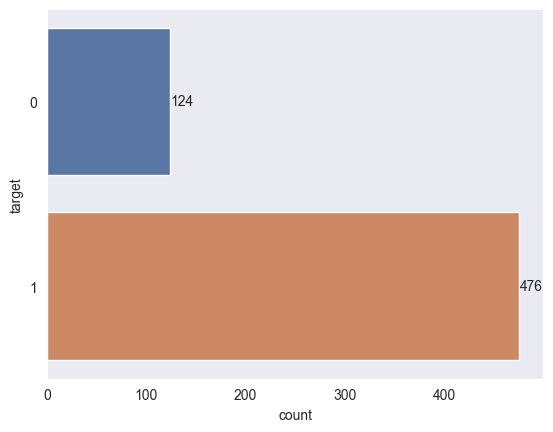

In [9]:
ax = sns.countplot(data=fraud_data, y='target', palette='deep')
ax.bar_label(ax.containers[0]);

##### Boxplots and Histograms of numerical columns

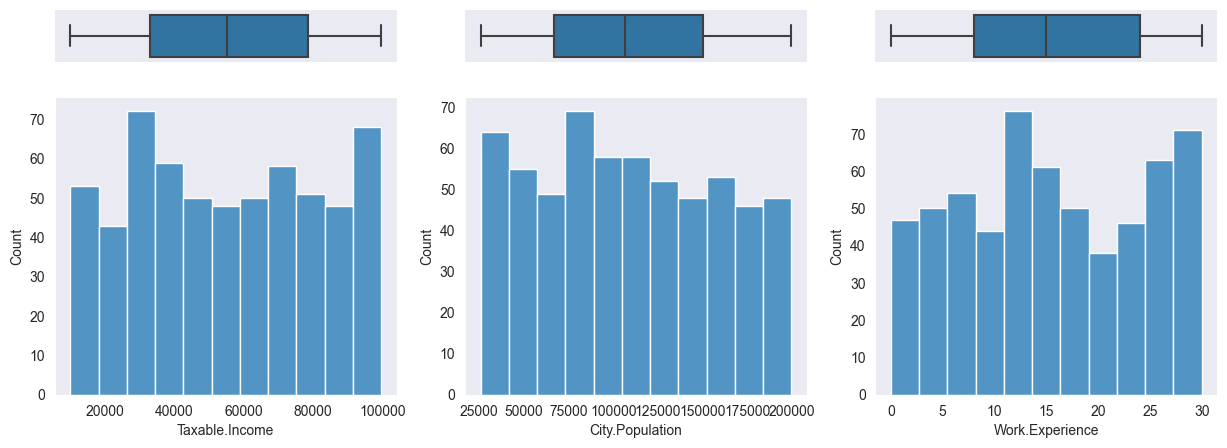

In [10]:
num_vars = ['Taxable.Income','City.Population','Work.Experience']

def plotboxhist(vars):
    figs, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=len(vars), figsize=(5*len(vars),5), gridspec_kw={'height_ratios':(0.15,0.85)})
    for i in range(len(vars)):
        sns.boxplot(data=fraud_data, x=vars[i], ax=ax_box[i])
        sns.histplot(data=fraud_data, x=vars[i], ax=ax_hist[i])
        sns.despine(ax=ax_box[i], left=True, bottom=True)
        ax_box[i].set_xticks([])
        ax_box[i].set_yticks([])
        ax_box[i].set_xlabel('')
    plt.show()

plotboxhist(num_vars)

##### Checking share of categories in categorical variables against target

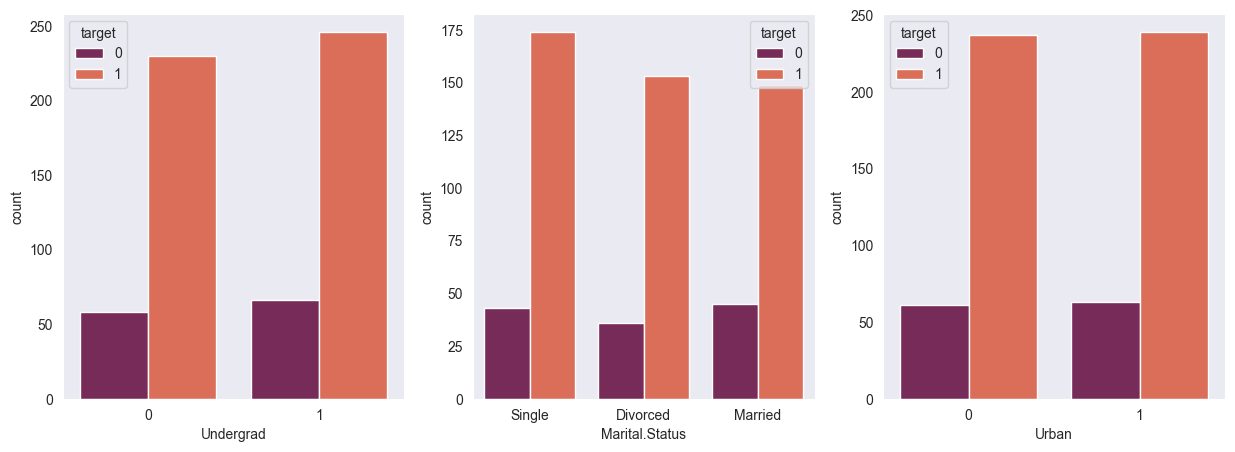

In [11]:
cat_var=['Undergrad','Marital.Status','Urban']

plt.figure(figsize=(15,5)),
for i in range(len(cat_var)):
    plt.subplot(1,3,i+1)
    sns.countplot(data=data, x=cat_var[i], hue='target', palette='rocket')

##### Multivariate analysis

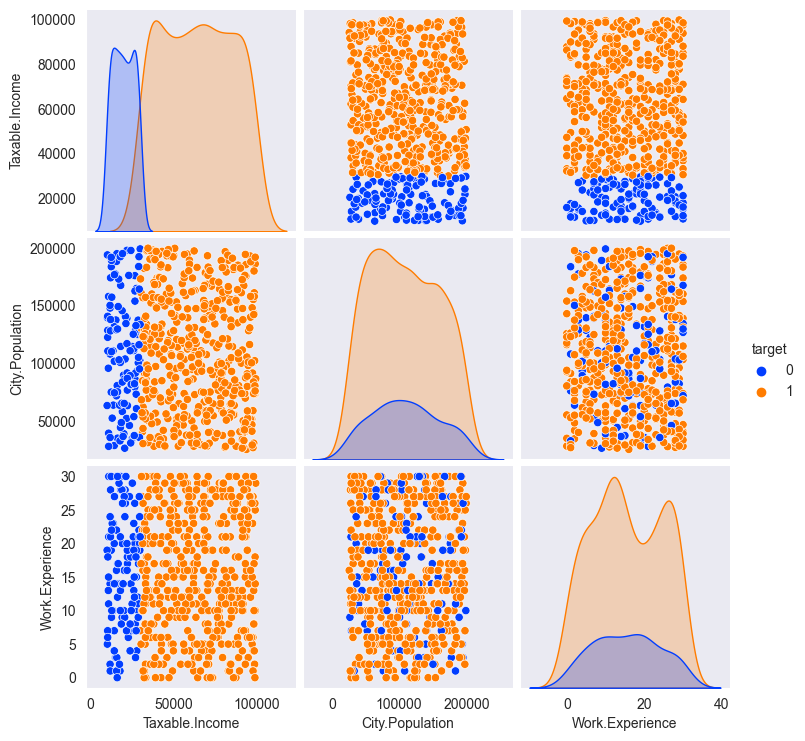

In [12]:
sns.pairplot(data=data.drop(cat_var,axis=1), hue='target', palette='bright')

### Preparing data for model

In [13]:
x = fraud_data.drop(['Taxable.Income','target'], axis=1)
y = fraud_data['target']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Model Building & Inferences

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

##### Plotting Tree

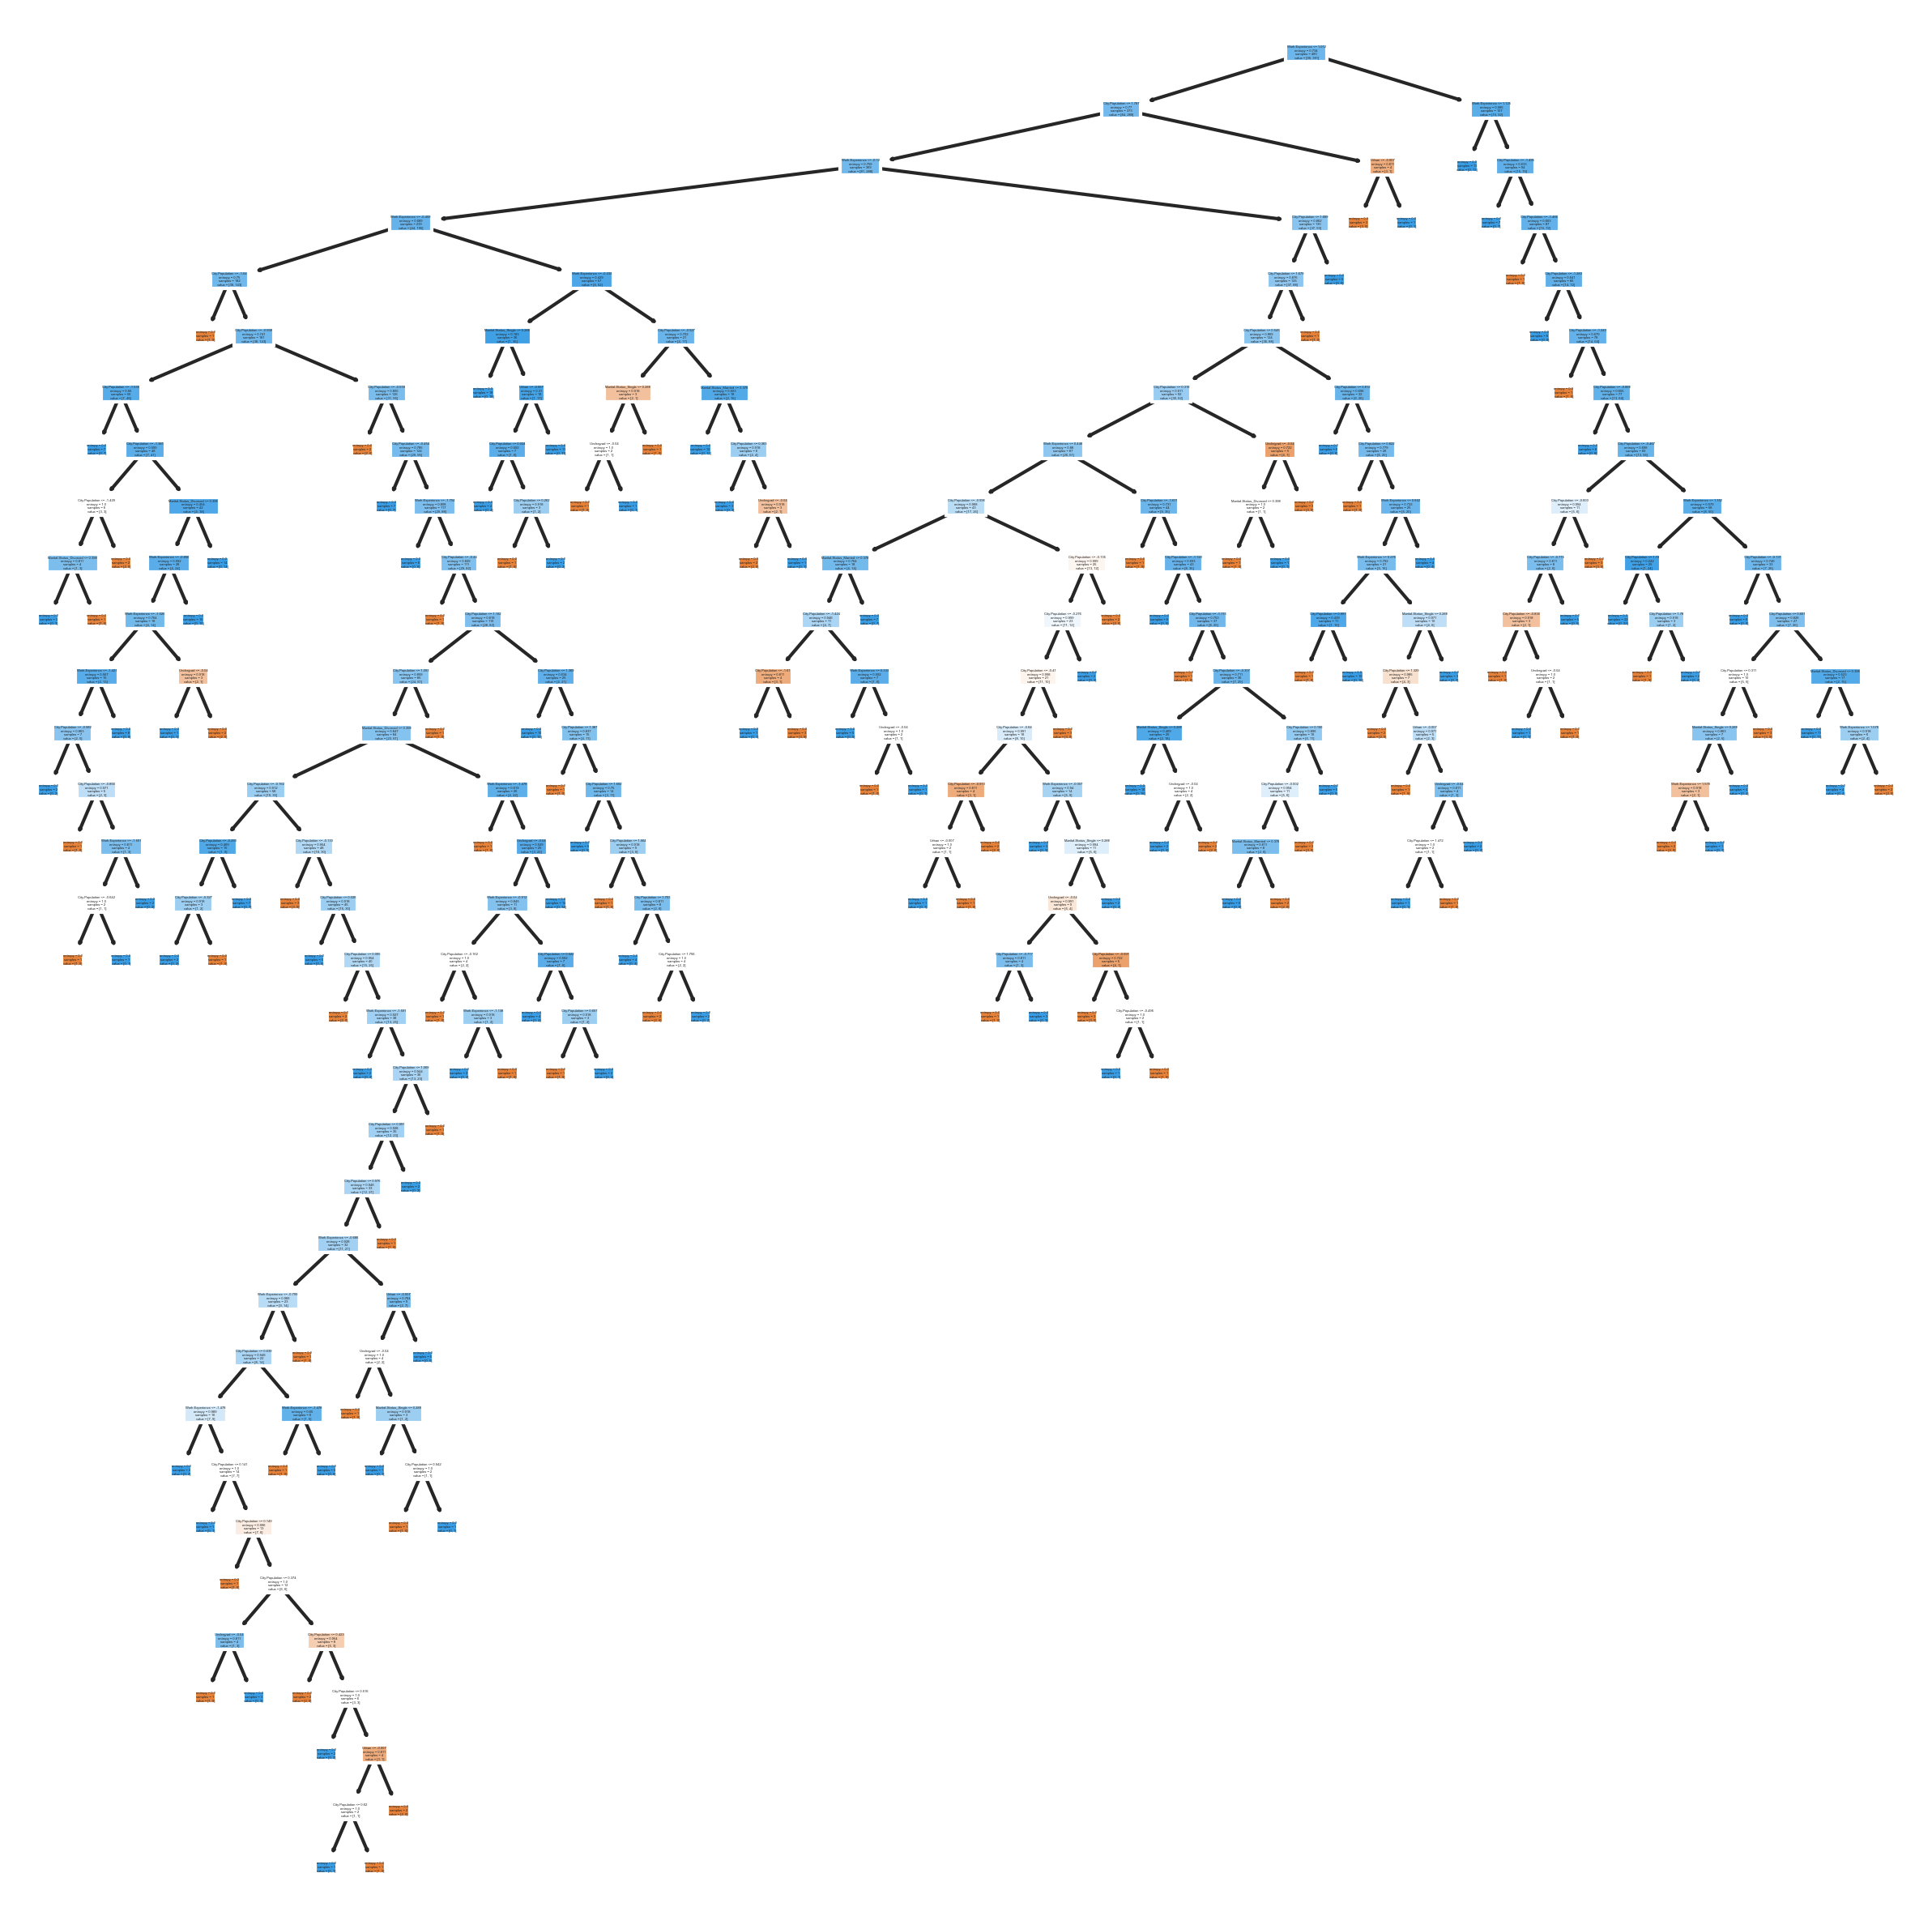

In [17]:
fn = x.columns
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
plot_tree(model,feature_names=fn,filled=True);

We can check importance of all features as following

In [18]:
model.feature_importances_

array([0.08187128, 0.57639045, 0.18555511, 0.0352052 , 0.0375107 ,
       0.03799925, 0.04546799])

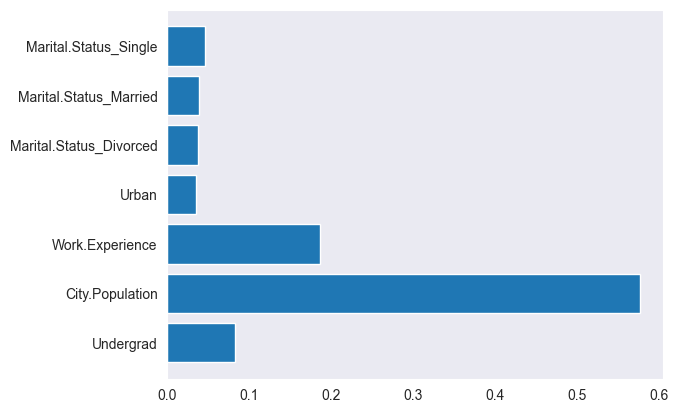

In [19]:
plt.barh(range(7),model.feature_importances_);
plt.yticks(np.arange(7),x.columns);

##### Prediction on test data

In [20]:
preds = model.predict(x_test)

Confusion Matrix

In [21]:
pd.crosstab(y_test,preds)

col_0,0,1
target,,
0,8,17
1,22,73


Accuracy

In [22]:
np.mean(y_test==preds)

0.675

Summarizing

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.27      0.32      0.29        25
           1       0.81      0.77      0.79        95

    accuracy                           0.68       120
   macro avg       0.54      0.54      0.54       120
weighted avg       0.70      0.68      0.69       120

